### **Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### **Data Collection & Processing**

In [2]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv("calories.csv")

In [3]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_data = pd.read_csv("exercise.csv")

In [5]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


### ***Combining the two Dataframes***

In [6]:
Data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [7]:
Data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
# checking the number of rows and columns
Data.shape

(15000, 9)

In [9]:
Data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [10]:
Data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
Data.isnull().any()

User_ID       False
Gender        False
Age           False
Height        False
Weight        False
Duration      False
Heart_Rate    False
Body_Temp     False
Calories      False
dtype: bool

In [13]:
# checking for missing values
Data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### ***Data Analysis***

In [14]:
# get some statistical measures about the data
Data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### ***Data Visualization***

In [15]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

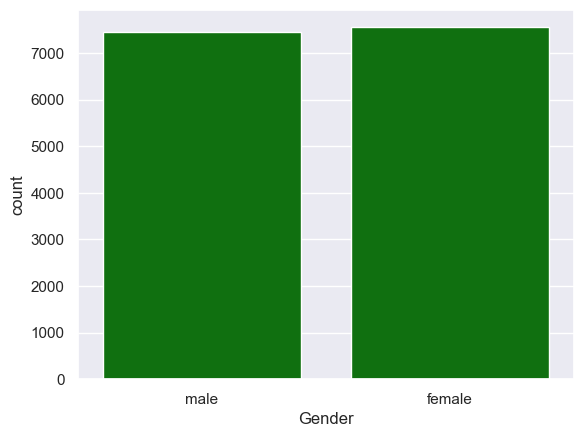

In [16]:
# plotting the gender column in count plot
sns.countplot(x="Gender",data=Data,color="green")

<Axes: xlabel='Age', ylabel='Count'>

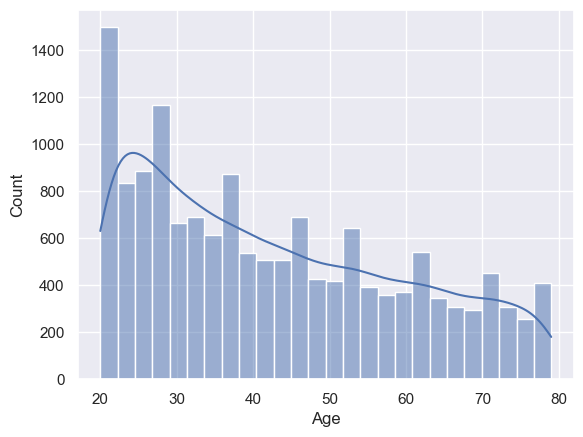

In [17]:
# finding the distribution of "Age" column
#sns.distplot(Data["Age"])
sns.histplot(Data["Age"], kde=True)

<Axes: xlabel='Height', ylabel='Count'>

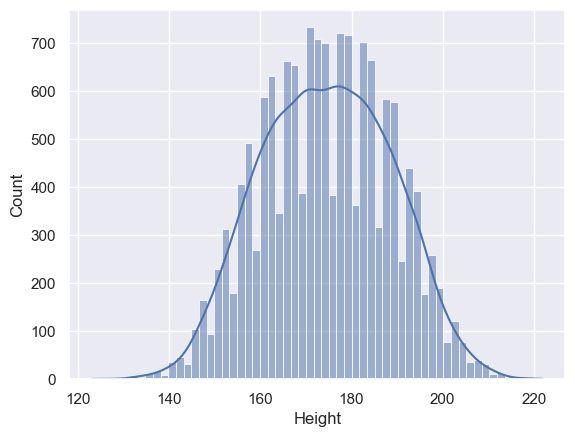

In [18]:
# finding the distribution of "Height" column
#sns.distplot(calories_data['Height'])
sns.histplot(Data["Height"], kde=True)

<Axes: xlabel='Weight', ylabel='Count'>

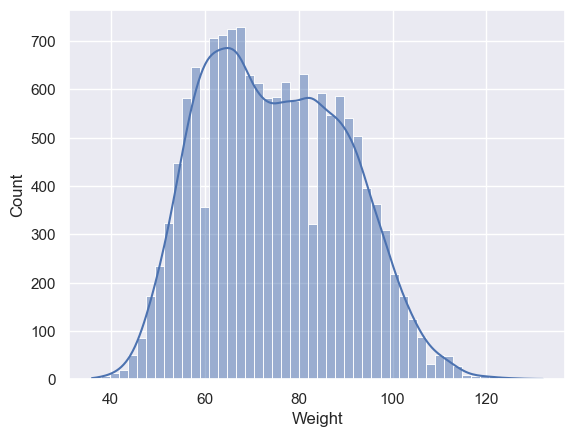

In [19]:
# finding the distribution of "Weight" column
# sns.distplot(calories_data['Weight'])
sns.histplot(Data["Weight"], kde=True)

### Finding the correlation in the dataset
1. Positive Correlation
2. Negative Correlation

In [20]:
Data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [21]:
import pandas as pd

# Drop non-numeric columns
numeric_data = Data.select_dtypes(include=['number'])

# Calculate the correlation
correlation= numeric_data.corr()

print(correlation)


             User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID     1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age        -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height     -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight     -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration   -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp   0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories   -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   

            Body_Temp  Calories  
User_ID      0.000923 -0.001661  
Age          0.013175  0.154395  
Height       0.001200  0.017537  
Weight       0.004095  0.035481  
Duration     0.903167  0.955421  
Heart_Rate   0.771529  0.897882  
Body_Temp    1.000000  0.824558  
Calories     0.824558  1.000000  


<Axes: >

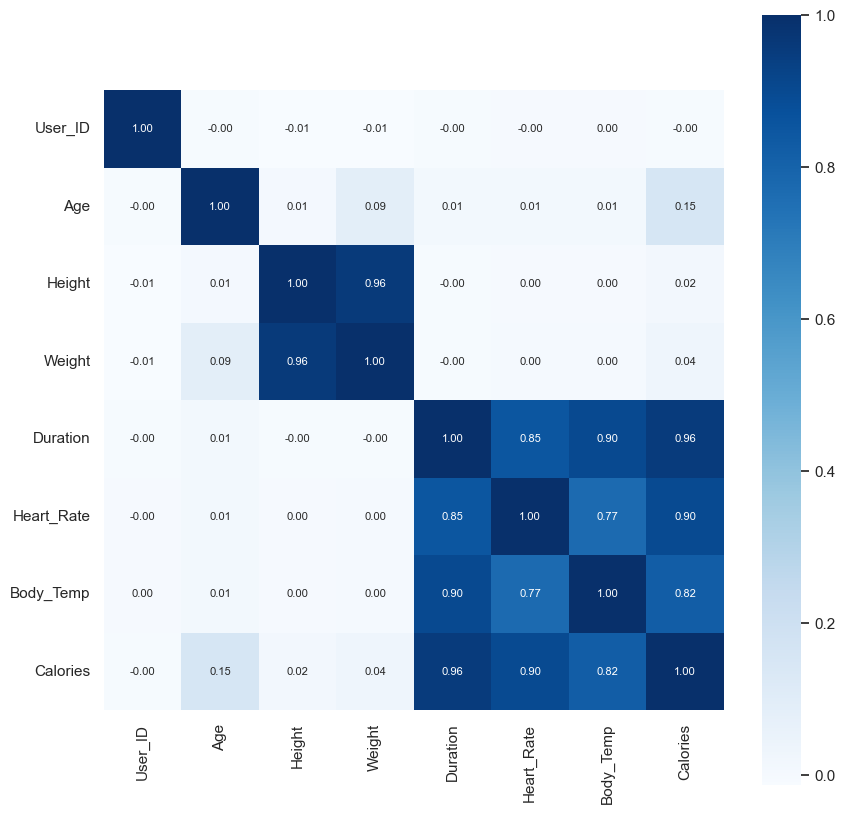

In [22]:
# constructing a heatmap to understand the correlation
# matplotlib lib as plt
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap="Blues")


In [23]:
numeric_data.cov()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,8.253275e+12,-89136.616455,-553798.129467,-501196.296045,-65756.444273,-12578.441776,2066.662238,-298106.551824
Age,-8.913662e+04,288.329371,2.313059,23.001902,1.871257,1.705643,0.174322,163.741593
Height,-5.537981e+05,2.313059,203.293804,205.472776,-0.548636,0.072151,0.013335,15.616820
Weight,-5.011963e+05,23.001902,205.472776,226.070974,-0.235702,0.621222,0.047980,33.319164
Duration,-6.575644e+04,1.871257,-0.548636,-0.235702,69.209144,67.995533,5.854845,496.429152
Heart_Rate,-1.257844e+04,1.705643,0.072151,0.621222,67.995533,91.840179,5.761479,537.423462
Body_Temp,2.066662e+03,0.174322,0.013335,0.047980,5.854845,5.761479,0.607199,40.129862
Calories,-2.981066e+05,163.741593,15.616820,33.319164,496.429152,537.423462,40.129862,3900.874095


### Converting the text data to numerical values

In [24]:
Data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2156\3941206520.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [25]:
Data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


### Separating features and Target

In [26]:
X = Data.drop(columns=['User_ID','Calories'], axis=1)
Y = Data['Calories']

In [27]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [28]:
Y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

### Splitting the data into training data and Test data

In [29]:
Xtrain,Xtest,Ytrain,Ytest= train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
X.shape

(15000, 7)

In [31]:
Xtrain.shape

(12000, 7)

In [32]:
Xtest.shape

(3000, 7)

### Model Training 1. XGBOOST Regressor

In [33]:
# loading the model
Model_XGBR= XGBRegressor()

In [34]:
# training the model with X_train
Model_XGBR.fit(Xtrain,Ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Prediction on Test Data

In [35]:
prediction=Model_XGBR.predict(Xtest)

In [36]:
prediction

array([125.58828 , 222.11377 ,  38.725952, ..., 144.3179  ,  23.425894,
        90.100494], dtype=float32)

In [37]:
Ytest

7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64

### Mean Absolute Error

In [38]:
MAE = metrics.mean_absolute_error(Ytest,prediction)

In [39]:
print("Mean Absolute Error = ", MAE)

Mean Absolute Error =  1.4833678883314132


In [40]:
MSE=metrics.mean_squared_error(Ytest,prediction)

In [41]:
MSE

4.710710012461346

In [42]:
Max_error=metrics.max_error(Ytest,prediction)

In [43]:
Max_error

23.1488037109375

### New prediction

In [44]:
Model_XGBR.predict([[1,2,3,45,1,3,14]])

array([3.444739], dtype=float32)